<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Instagram-Reach/blob/main/InstagramReach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Uploading the dataset, specifying the encoding
df = pd.read_csv('/content/Instagram data.csv', encoding='latin-1')

In [45]:
# Head
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [46]:
# Missing values
df.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [47]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-48-fd5c1a3a8a75>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='From Home', ylabel='Density'>

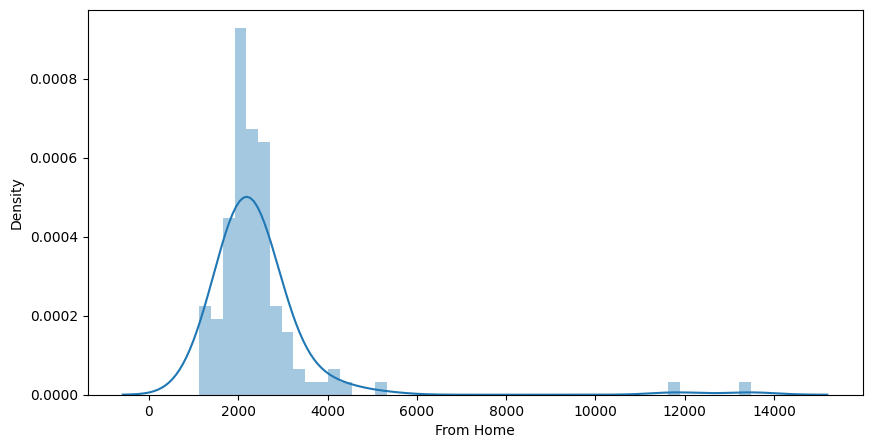

In [48]:
# PLotting From Home
plt.figure(figsize=(10,5))
sns.distplot(df['From Home'])

<ipython-input-49-3524f26c332a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='From Hashtags', ylabel='Density'>

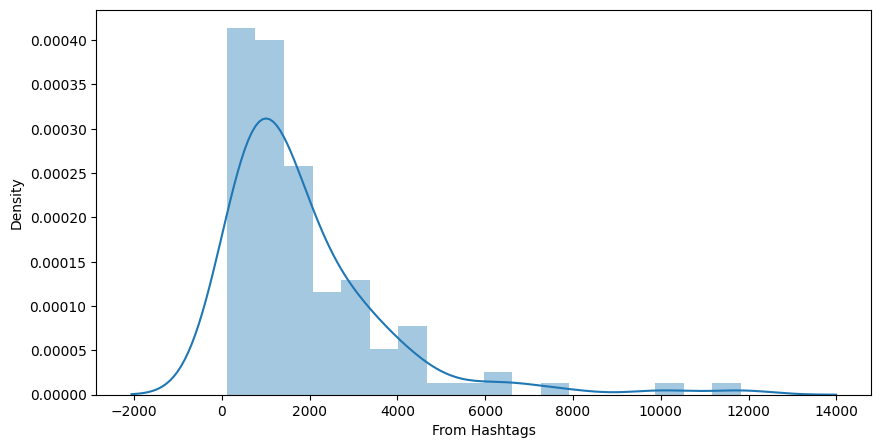

In [49]:
# Plotting From Hashtags
plt.figure(figsize=(10,5))
sns.distplot(df['From Hashtags'])

<ipython-input-50-dae3a9f8da46>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='From Explore', ylabel='Density'>

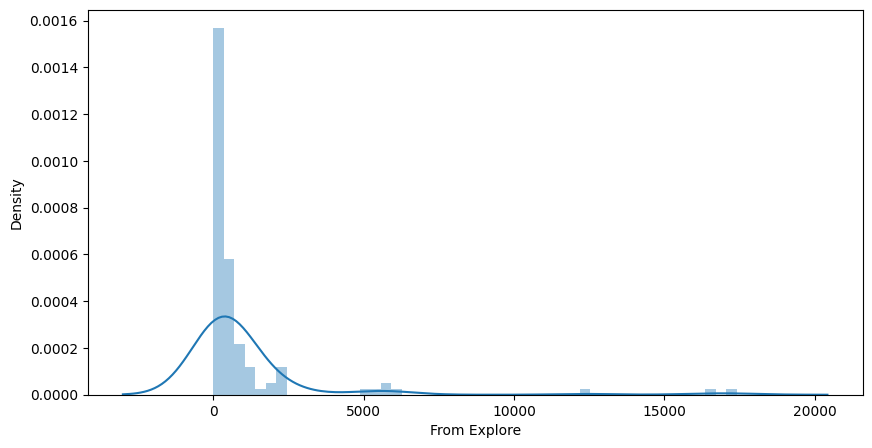

In [50]:
# Plotting From Explore
plt.figure(figsize=(10,5))
sns.distplot(df['From Explore'])

In [51]:
# Impressions percentage
home = df['From Home'].sum()
hashtag = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()
total = home + hashtag + explore + other

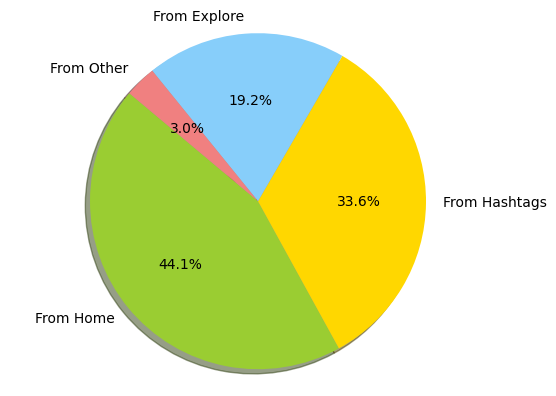

In [52]:
# Plottin Pie chart
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
sizes = [home, hashtag, explore, other]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

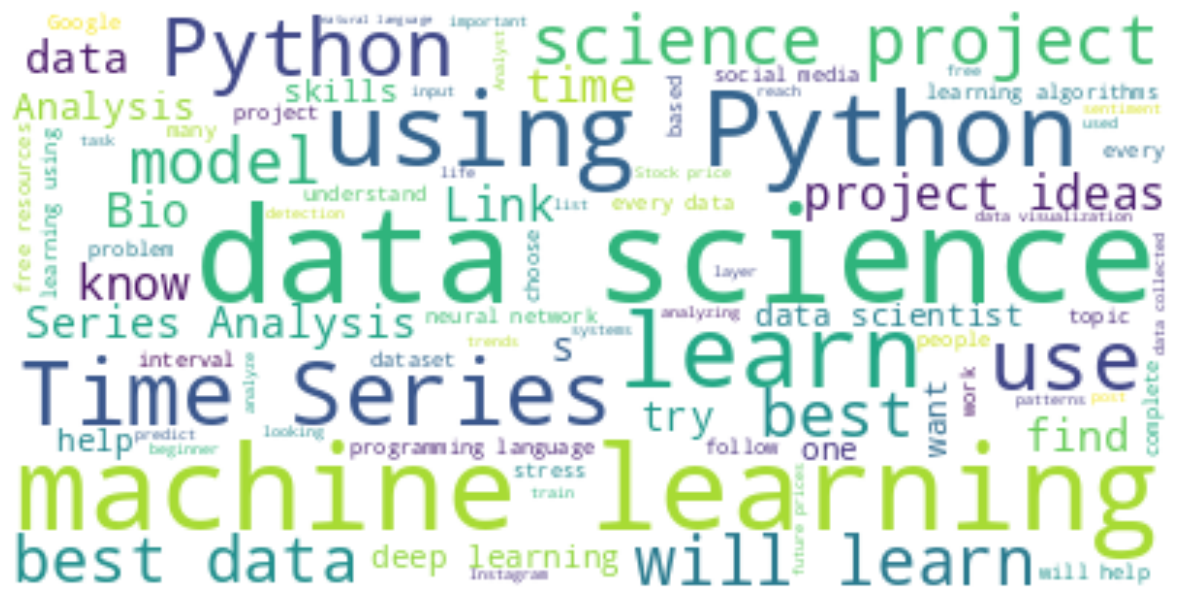

In [53]:
# Analyzing the StopWords in Caption
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

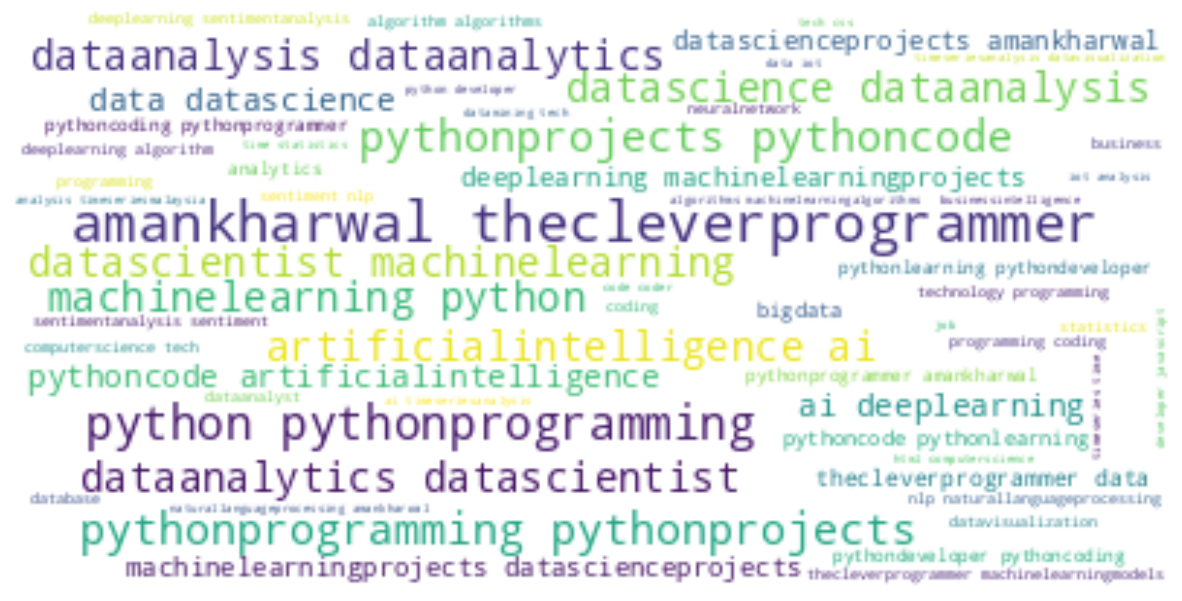

In [54]:
# Analyzing the StopWords in Hashtags
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

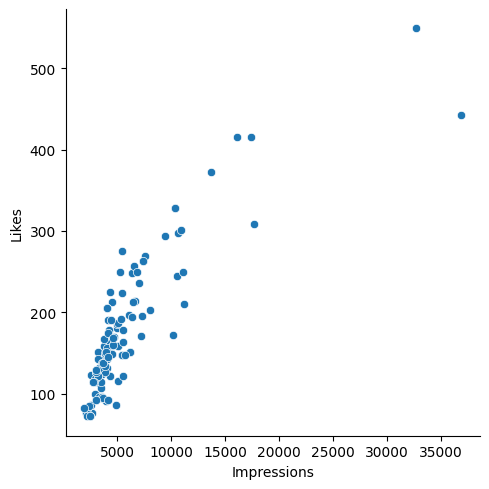

In [55]:
# Relationship between Impressions and Likes
sns.relplot(x="Impressions", y="Likes", data=df)

In [56]:
# Relationship between Impressions and Likes with plotly
fig = px.scatter(df, x="Impressions", y="Likes", size="Likes", color="Impressions",
           hover_name="Caption", log_x=True, size_max=60)
fig.show()

In [57]:
# Relationship between Impressions and Comments with plotly
fig = px.scatter(df, x="Impressions", y="Comments", size="Comments", color="Impressions",
           hover_name="Caption", log_x=True, size_max=60)
fig.show()

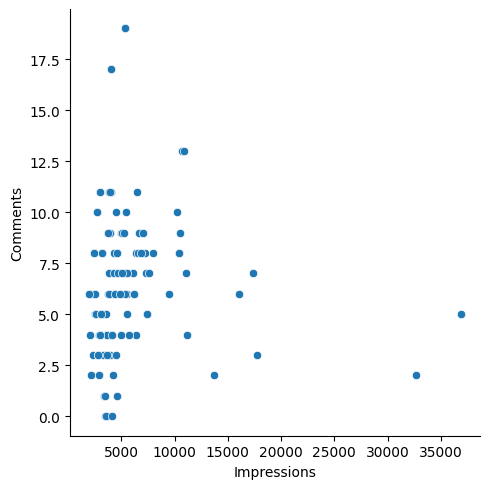

In [58]:
# Relationship between Impressions and Comments
sns.relplot(x="Impressions", y="Comments", data=df)

In [59]:
# Relationship between Impressions and Shares with plotly
fig = px.scatter(df, x="Impressions", y="Shares", size="Shares", color="Impressions",
           hover_name="Caption", log_x=True, size_max=60)
fig.show()

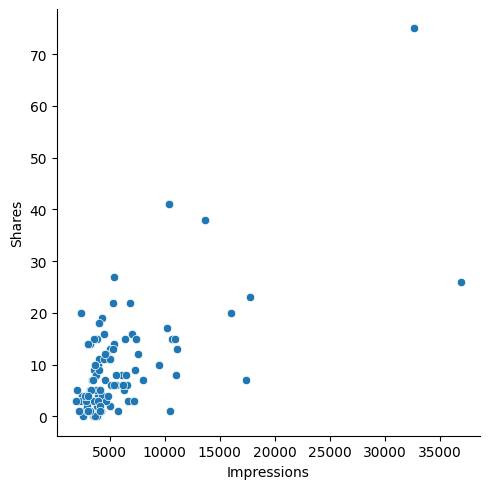

In [60]:
# Relationship between Impressions and Shares
sns.relplot(x="Impressions", y="Shares", data=df)

In [61]:
# Relationship between Impressions and Saves with plotly
fig = px.scatter(df, x="Impressions", y="Saves", size="Saves", color="Impressions",
           hover_name="Caption", log_x=True, size_max=60)
fig.show()

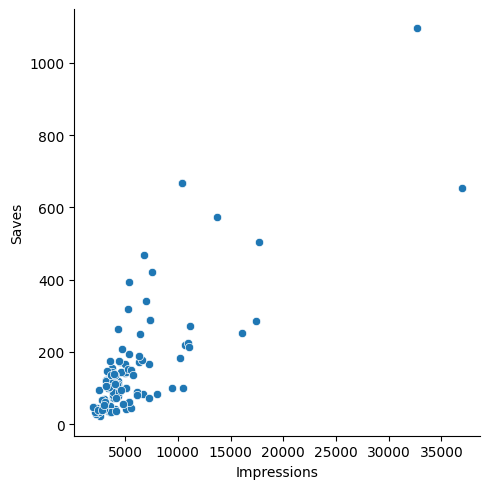

In [62]:
# Relationship between Impressions and Saves
sns.relplot(x="Impressions", y="Saves", data=df)

In [63]:
df_numeric = df.select_dtypes(exclude=['object'])

In [64]:
correlation = df_numeric.corr()['Impressions']
print(correlation)

Impressions       1.000000
From Home         0.844698
From Hashtags     0.560760
From Explore      0.893607
From Other        0.592960
Saves             0.779231
Comments         -0.028524
Shares            0.634675
Likes             0.849835
Profile Visits    0.760981
Follows           0.889363
Name: Impressions, dtype: float64


In [65]:
# Getting the Conversion Rate
Conversion_Rate = (df['Follows'].sum() / df['Profile Visits'].sum()) * 100
print(Conversion_Rate)

41.00265604249668


In [66]:
# Relationship between Follows and Profile Visits with plotly
fig = px.scatter(df, x="Follows", y="Profile Visits", size="Profile Visits", color="Follows",
           hover_name="Caption", log_x=True, size_max=60)
fig.show()

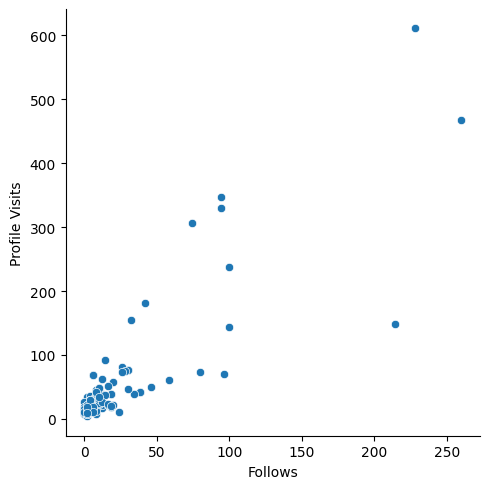

In [67]:
# Relationship between Follows and Profile Visits
sns.relplot(x="Follows", y="Profile Visits", data=df)

In [68]:
# Seperating data and Impressions
X = np.array(df[['Likes', 'Saves', 'Comments', 'Shares',
                 'Profile Visits', 'Follows']])
Y = np.array(df['Impressions'])

In [70]:
# Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [71]:
# Shape
print(X.shape, X_train.shape, X_test.shape)

(119, 6) (95, 6) (24, 6)


In [80]:
# Model
model = RandomForestRegressor()

In [81]:
# Fitting the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [82]:
# Scoring the model
model.score(X_test, Y_test)

0.8537539870376022

In [84]:
# Predicting by an input data
features = np.array([[300, 200, 2, 6, 143, 38]])
model.predict(features.reshape(1, -1))

array([11191.08])